In [4]:
import io
import requests
import re
import warnings
import os
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-notebook')
from matplotlib.ticker import StrMethodFormatter
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer

In [5]:
train_data = pd.read_csv("Train_Data.csv")
train_data.head(100)

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2,Business_Sourced
0,FIN1000001,842001,4/16/2007,844120.0,M,12/19/1971,M,Others,Graduate,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,0
1,FIN1000002,842001,4/16/2007,844111.0,M,2/17/1983,S,Others,Class XII,11/10/2005,...,Confirmation,M,2/17/1978,2.0,1.0,335249.0,28.0,335249.0,28.0,1
2,FIN1000003,800001,4/16/2007,844101.0,M,1/16/1966,M,Business,Class XII,5/27/2006,...,Confirmation,M,3/3/1969,0.0,0.0,357184.0,24.0,357184.0,24.0,0
3,FIN1000004,814112,4/16/2007,814112.0,M,2/3/1988,S,Salaried,Class XII,8/21/2003,...,Confirmation,F,8/14/1978,0.0,0.0,318356.0,22.0,318356.0,22.0,0
4,FIN1000005,814112,4/16/2007,815351.0,M,7/4/1985,M,Others,Class XII,5/8/2006,...,Confirmation,M,2/7/1971,2.0,1.0,230402.0,17.0,230402.0,17.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,FIN1000096,226001,4/17/2007,261001.0,F,7/8/1964,M,Others,Graduate,9/5/2006,...,Confirmation,M,12/16/1960,0.0,1.0,57320.0,4.0,57320.0,4.0,0
96,FIN1000097,284001,4/17/2007,284202.0,M,7/3/1987,S,Others,Class X,5/8/2006,...,Confirmation,M,8/23/1967,1.0,1.0,171830.0,16.0,171830.0,16.0,0
97,FIN1000098,226001,4/17/2007,261001.0,M,5/20/1978,M,Business,Graduate,5/25/2006,...,Confirmation,M,11/7/1979,0.0,0.0,41810.0,4.0,41810.0,4.0,0
98,FIN1000099,226001,4/17/2007,226001.0,F,8/17/1982,S,Business,Class XII,11/15/2006,...,Confirmation,M,7/8/1977,0.0,1.0,115986.0,8.0,115986.0,8.0,0


In [6]:
test_data = pd.read_csv("Test_Data.csv")
test_data.tail(100)

,ID,Office_PIN,Application_Receipt_Date,Applicant_City_PIN,Applicant_Gender,Applicant_BirthDate,Applicant_Marital_Status,Applicant_Occupation,Applicant_Qualification,Manager_DOJ,...,Manager_Grade,Manager_Status,Manager_Gender,Manager_DoB,Manager_Num_Application,Manager_Num_Coded,Manager_Business,Manager_Num_Products,Manager_Business2,Manager_Num_Products2
4945,FIN1014473,751009,12/31/2008,754119.0,F,6/7/1972,S,NaN,Graduate,12/18/2008,...,4.0,Probation,F,7/11/1972,0.0,0.0,0.0,0.0,0.0,0.0
4946,FIN1014474,680001,1/1/2009,680587.0,M,6/7/1950,M,NaN,Graduate,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4947,FIN1014475,641018,1/1/2009,641012.0,M,5/9/1971,M,Business,Graduate,12/2/2008,...,4.0,Probation,M,1/8/1974,0.0,0.0,0.0,0.0,0.0,0.0
4948,FIN1014476,273001,1/1/2009,274407.0,M,1/3/1983,M,Business,Graduate,12/9/2008,...,3.0,Probation,M,8/7/1976,0.0,0.0,0.0,0.0,0.0,0.0
4949,FIN1014477,530003,1/1/2009,530028.0,F,4/6/1974,M,NaN,Graduate,12/3/2008,...,2.0,Probation,M,7/13/1972,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5040,FIN1014568,691008,1/1/2009,691601.0,F,5/21/1966,M,Others,Graduate,12/2/2008,...,3.0,Probation,M,5/27/1978,0.0,0.0,0.0,0.0,0.0,0.0
5041,FIN1014569,691008,1/1/2009,691601.0,M,12/2/1949,M,Others,Graduate,12/2/2008,...,3.0,Probation,M,5/27/1978,0.0,0.0,0.0,0.0,0.0,0.0
5042,FIN1014570,691008,1/1/2009,691005.0,M,5/20/1977,M,Business,Class XII,12/2/2008,...,3.0,Probation,M,5/27/1978,0.0,0.0,0.0,0.0,0.0,0.0
5043,FIN1014571,208001,1/1/2009,208022.0,M,7/22/1985,M,NaN,Graduate,9/25/2008,...,3.0,Probation,M,6/26/1978,4.0,1.0,15347.0,1.0,15347.0,1.0


In [7]:
train_data.info

<bound method DataFrame.info of               ID  Office_PIN Application_Receipt_Date  Applicant_City_PIN  \
0     FIN1000001      842001                4/16/2007            844120.0   
1     FIN1000002      842001                4/16/2007            844111.0   
2     FIN1000003      800001                4/16/2007            844101.0   
3     FIN1000004      814112                4/16/2007            814112.0   
4     FIN1000005      814112                4/16/2007            815351.0   
...          ...         ...                      ...                 ...   
9522  FIN1009523      160017                 7/1/2008            160032.0   
9523  FIN1009524      848101                 7/1/2008            848302.0   
9524  FIN1009525      753012                 7/1/2008            753014.0   
9525  FIN1009526      575003                 7/1/2008            571248.0   
9526  FIN1009527      411006                 7/1/2008            411006.0   

     Applicant_Gender Applicant_BirthDate A

In [8]:
train_data.isnull().sum()

ID                                0
Office_PIN                        0
Application_Receipt_Date          0
Applicant_City_PIN               97
Applicant_Gender                 67
Applicant_BirthDate              73
Applicant_Marital_Status         73
Applicant_Occupation           1221
Applicant_Qualification          86
Manager_DOJ                     683
Manager_Joining_Designation     683
Manager_Current_Designation     683
Manager_Grade                   683
Manager_Status                  683
Manager_Gender                  683
Manager_DoB                     683
Manager_Num_Application         683
Manager_Num_Coded               683
Manager_Business                683
Manager_Num_Products            683
Manager_Business2               683
Manager_Num_Products2           683
Business_Sourced                  0
dtype: int64

In [11]:
def random_gen(string):
    data = [train_data, test_data]
    for dataset in data:
        mean = train_data[string].mean()
        std = test_data[string].std()
        is_null = dataset[string].isnull().sum()
        # compute random numbers between the mean, std and is_null
        rand_string = np.random.randint(mean - std, mean + std, size = is_null)
        # fill NaN values in Age column with random values generated
        string_slice = dataset[string].copy()
        string_slice[np.isnan(string_slice)] = rand_string
        dataset[string] = string_slice
        dataset[string] = train_data[string].astype(int)

In [12]:
random_gen('Manager_Num_Products2')
random_gen('Manager_Business2')
random_gen('Manager_Num_Products')
random_gen('Manager_Business')
random_gen('Manager_Num_Coded')
random_gen('Manager_Grade')
random_gen('Manager_Num_Application')

In [13]:
train_data['Applicant_Occupation'].dropna(inplace = True)
train_data['Manager_Current_Designation'].dropna(inplace = True)
train_data['Manager_Status'].dropna(inplace = True)

In [14]:
train_data.info

<bound method DataFrame.info of               ID  Office_PIN Application_Receipt_Date  Applicant_City_PIN  \
0     FIN1000001      842001                4/16/2007            844120.0   
1     FIN1000002      842001                4/16/2007            844111.0   
2     FIN1000003      800001                4/16/2007            844101.0   
3     FIN1000004      814112                4/16/2007            814112.0   
4     FIN1000005      814112                4/16/2007            815351.0   
...          ...         ...                      ...                 ...   
9522  FIN1009523      160017                 7/1/2008            160032.0   
9523  FIN1009524      848101                 7/1/2008            848302.0   
9524  FIN1009525      753012                 7/1/2008            753014.0   
9525  FIN1009526      575003                 7/1/2008            571248.0   
9526  FIN1009527      411006                 7/1/2008            411006.0   

     Applicant_Gender Applicant_BirthDate A

In [15]:
param_test1 = {
    'n_estimators': [100,200,500,750,1000],
    'max_depth': [3,5,7,9],
    'min_child_weight': [1,3,5],
    'gamma':[i/10.0 for i in range(0,5)],
    'subsample':[i/10.0 for i in range(6,10)],
    'colsample_bytree':[i/10.0 for i in range(6,10)],
    'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05, 0.1, 1],
    'learning_rate': [0.01, 0.02, 0.05, 0.1]
}

In [16]:
# Getting Features
features = ['Manager_Num_Products2','Manager_Num_Products','Manager_Business','Manager_Business2','Manager_Num_Coded', 'Manager_Num_Application','Manager_Grade','Manager_Status','Manager_Current_Designation','Applicant_Occupation']
x = pd.get_dummies(train_data[features])

# Predicting value
y = train_data['Business_Sourced']
y.shape, x.shape

((9527,), (9527, 19))

In [17]:
xtest = pd.get_dummies(test_data[features])
xtest

,Manager_Num_Products2,Manager_Num_Products,Manager_Business,Manager_Business2,Manager_Num_Coded,Manager_Num_Application,Manager_Grade,Manager_Status_Confirmation,Manager_Status_Probation,Manager_Current_Designation_Level 1,Manager_Current_Designation_Level 2,Manager_Current_Designation_Level 3,Manager_Current_Designation_Level 4,Manager_Current_Designation_Level 5,Applicant_Occupation_Business,Applicant_Occupation_Others,Applicant_Occupation_Salaried,Applicant_Occupation_Self Employed,Applicant_Occupation_Student
0,28,28,335249,335249,1,2,3,0,1,1,0,0,0,0,0,0,1,0,0
1,28,28,335249,335249,1,2,3,0,1,1,0,0,0,0,0,0,1,0,0
2,24,24,357184,357184,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
3,22,22,318356,318356,0,0,4,0,0,0,0,0,0,0,0,0,1,0,0
4,17,17,230402,230402,1,2,2,1,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5040,9,9,175273,175273,1,1,4,0,1,0,1,0,0,0,0,1,0,0,0
5041,10,10,225710,225710,0,1,3,0,1,0,1,0,0,0,0,1,0,0,0
5042,0,0,0,0,0,3,3,0,1,0,1,0,0,0,1,0,0,0,0
5043,8,8,177204,177204,1,1,2,0,1,0,1,0,0,0,0,0,0,0,0


In [18]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

In [19]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(x, y)
Y_pred = logreg.predict(xtest)
acc_log = round(logreg.score(x, y) * 100, 2)
acc_log

65.54

In [21]:
# Support Vector Machines

svc = SVC()
svc.fit(x, y)
Y_pred = svc.predict(xtest)
acc_svc = round(svc.score(x, y) * 100, 2)
acc_svc

65.78

In [31]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x, y)
Y_pred = knn.predict(xtest)
acc_knn = round(knn.score(x, y) * 100, 2)
acc_knn

70.39

In [23]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(x, y)
Y_pred = gaussian.predict(xtest)
acc_gaussian = round(gaussian.score(x, y) * 100, 2)
acc_gaussian

64.88

In [24]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(x, y)
Y_pred = perceptron.predict(xtest)
acc_perceptron = round(perceptron.score(x, y) * 100, 2)
acc_perceptron

64.9

In [25]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(x, y)
Y_pred = linear_svc.predict(xtest)
acc_linear_svc = round(linear_svc.score(x, y) * 100, 2)
acc_linear_svc

C:\Users\Sreyoshi\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


45.48

In [26]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(x, y)
Y_pred = sgd.predict(xtest)
acc_sgd = round(sgd.score(x, y) * 100, 2)
acc_sgd

42.08

In [27]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(x, y)
Y_pred = decision_tree.predict(xtest)
acc_decision_tree = round(decision_tree.score(x, y) * 100, 2)
acc_decision_tree

85.69

In [32]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=500)
random_forest.fit(x, y)
Y_pred = random_forest.predict(xtest)
random_forest.score(x, y)
acc_random_forest = round(random_forest.score(x, y) * 100, 2)
acc_random_forest

85.69

In [29]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
sorted_model=models.sort_values(by='Score', ascending=False)
sorted_model

,Model,Score
3,Random Forest,85.69
8,Decision Tree,85.69
1,KNN,72.99
0,Support Vector Machines,65.78
2,Logistic Regression,65.54
5,Perceptron,64.90
4,Naive Bayes,64.88
7,Linear SVC,45.48
6,Stochastic Gradient Decent,42.08


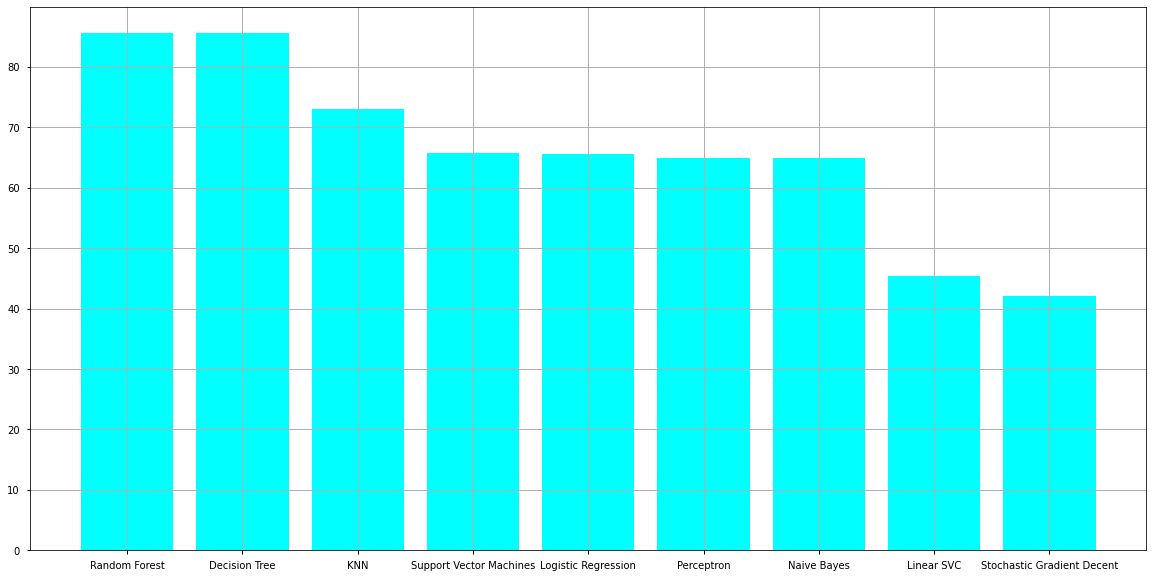

In [30]:
plt.figure(figsize=(20,10))
fig = plt.bar(sorted_model['Model'], sorted_model['Score'],color='aqua')
plt.grid()
plt.show()

In [34]:
output = pd.DataFrame({'ID': test_data.ID, 'Business_Sourced': Y_pred.astype(int)})
output.to_csv('submission4.csv', index=False)

In [35]:
output.head(100)

,ID,Business_Sourced
0,FIN1009528,0
1,FIN1009529,0
2,FIN1009530,0
3,FIN1009531,0
4,FIN1009532,0
...,...,...
95,FIN1009623,0
96,FIN1009624,0
97,FIN1009625,0
98,FIN1009626,0
